In [ ]:
# -*- coding: utf-8 -*-
"""
3D Point Cloud to 2D Image Generation

Created by Florent Poux, (c) 2023 Licence MIT
To reuse in your project, please cite the most appropriate article accessible on my Google Scholar page

Have fun with this script!
"""

In [1]:

#%% 1. Loading Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
#%% 2. Loading the point cloud dataset

DATA_PATH = "../DATA/toulouse_poux.xyz"
pcd = np.loadtxt(DATA_PATH,delimiter=";")
coords = pcd[:,0:3]
colors = pcd[:,3:6]

In [23]:
#%% 3. Parameters settings

resolution_y = 400
center_coordinates = [-2,30,8.7]



In [24]:
#%% 4. Translate the point cloud by the negation of the center coordinates

translated_points = coords - center_coordinates



In [25]:
#%% 5. Convert 3D point cloud to spherical coordinates
theta = np.arctan2(translated_points[:,1],translated_points[:,0])
phi = np.arccos(translated_points[:,2]/np.linalg.norm(translated_points,axis=1))



In [26]:
#%% 6. Map spherical coordinates to pixel coordinates
x = (theta + np.pi) / (2 * np.pi) * (2*resolution_y)
y = phi / np.pi * resolution_y



In [27]:
#%% 7. Create the spherical image with RGB channels
resolution_x = 2* resolution_y
spherical_image = np.zeros((resolution_y,resolution_x,3),dtype=np.uint8)



In [28]:
#%% 8. Create the mapping between point cloud and image coordinates
mapping = np.full((resolution_y,resolution_x),-1,dtype=int)
mapping_multiple = np.full((resolution_y,resolution_x),-1,dtype=object)

In [29]:
#%% 9. Assign Points to the Image pixels

for i in range(len(translated_points)):
    ix = np.clip(int(x[i]),0,resolution_x -1)
    iy = np.clip(int(y[i]),0,resolution_y -1)
    if mapping[iy, ix] == -1 or np.linalg.norm(translated_points[i]) < np.linalg.norm(translated_points[mapping[iy,ix]]):
        mapping[iy, ix] = i
        spherical_image[iy, ix] = colors [i]
    if mapping_multiple[iy, ix] == -1:
        mapping_multiple[iy, ix] = []
        mapping_multiple[iy, ix].append(i)

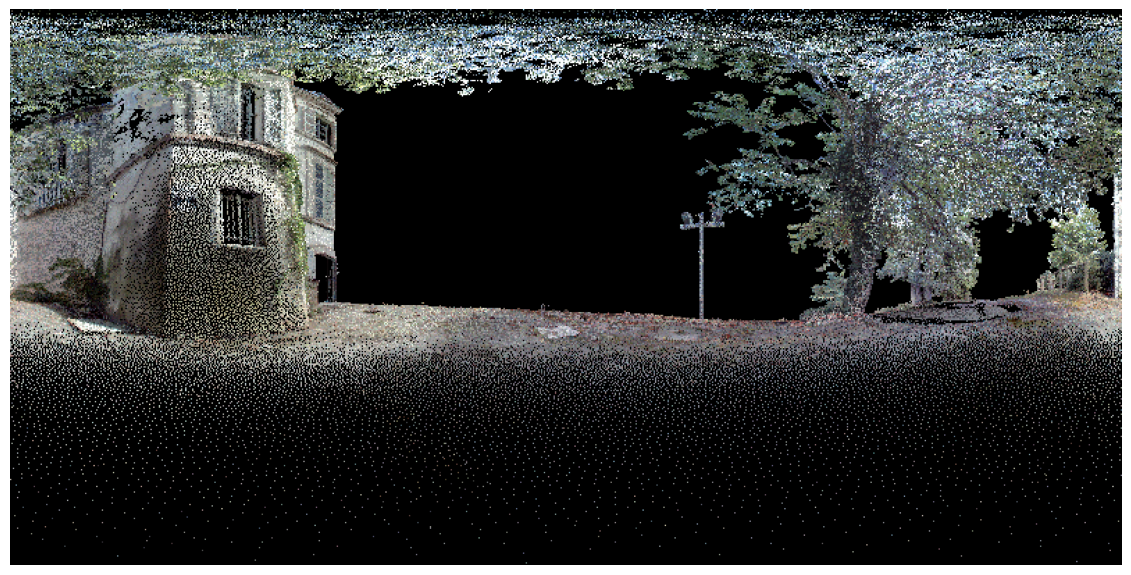

In [30]:
#%% 10. Plotting and Exporting the RGB Panorama
fig = plt.figure(figsize=(np.shape(spherical_image)[1]/72, np.shape(spherical_image)[0]/72))
fig.add_axes([0,0,1,1])

plt.imshow(spherical_image)
plt.axis('off')
plt.savefig(DATA_PATH.split(".xyz")[0]+".jpg")